In [21]:
##### Task 1 ###
### Your POS Tagger in TreeBank Dataset###

import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import TaggedCorpusReader



annotated_sent = nltk.corpus.treebank.tagged_sents()

print("Tagged sentences: ", len(annotated_sent))
print("Tagged words:", len(nltk.corpus.treebank.tagged_words()))


Tagged sentences:  3914
Tagged words: 100676


In [5]:
def features(sentence, index):
    return {
        'word': sentence[index],
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'prefix-1': sentence[index][0],
        'suffix-1': sentence[index][-1],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1]
    }
import pprint 
pprint.pprint(features(['This', 'is', 'a', 'sentence'], 2))

{'is_capitalized': False,
 'next_word': 'sentence',
 'prefix-1': 'a',
 'prev_word': 'is',
 'suffix-1': 'a',
 'word': 'a'}


In [6]:
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]


In [7]:
cutoff = int(.75 * len(annotated_sent))
training_sentences = annotated_sent[:cutoff]
test_sentences = annotated_sent[cutoff:]
 
print(len(training_sentences))
print(len(test_sentences))
 
def transform_to_dataset(tagged_sentences):
    X, y = [], []
    for tagged in tagged_sentences:
        for index in range(len(tagged)):
            X.append(features(untag(tagged), index))
            y.append(tagged[index][1])
 
    return X, y
 
X, y = transform_to_dataset(training_sentences)

2935
979


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

size=10000

clf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', DecisionTreeClassifier(criterion='entropy'))
])
clf.fit(X[:size], y[:size])
 
print('training OK')
 
X_test, y_test = transform_to_dataset(test_sentences)
 
print("Accuracy:", clf.score(X_test, y_test))

def pos_tag(sentence):
    print('checking...')
    tagged_sentence = []
    tags = clf.predict([features(sentence, index) for index in range(len(sentence))])
    return zip(sentence, tags)

import platform
print(platform.python_version())

print(list(pos_tag(word_tokenize('Hello world, lets do something awesome today!'))))

training OK
Accuracy: 0.8798007391933151
3.6.4
checking...
[('Hello', 'NNP'), ('world', 'NN'), (',', ','), ('lets', 'NNS'), ('do', 'VB'), ('something', 'VBG'), ('awesome', 'NN'), ('today', 'NN'), ('!', 'NNP')]


In [10]:
def pos_tag(sentence):
    print('checking...')
    tagged_sentence = []
    tags = clf.predict([features(sentence, index) for index in range(len(sentence))])
    return zip(sentence, tags)

import platform
print(platform.python_version())

print(list(pos_tag(word_tokenize('Hello world, lets do something awesome today!'))))

3.6.4
checking...
[('Hello', 'NNP'), ('world', 'NN'), (',', ','), ('lets', 'NNS'), ('do', 'VB'), ('something', 'VBG'), ('awesome', 'NN'), ('today', 'NN'), ('!', 'NNP')]


In [11]:
### ### Model3.x in X1 ####

from nltk.corpus import treebank
from nltk import DefaultTagger as df
from nltk import UnigramTagger as ut
from nltk import BigramTagger as bt
from nltk import TrigramTagger as tg

size = int(len(annotated_sent) * 0.9)

patterns = [(r'.*ing$', 'VBG'), (r'.*ed$', 'VBD'), (r'.*es$', 'VBZ'), (r'.*ould$', 'MD'), (r'.*\'s$', 'NN$'),               
             (r'.*s$', 'NNS'), (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), (r'.*', 'NN')]



train_sents = annotated_sent[:size]
test_sents = annotated_sent[size:]

accuracy1_3_1_x1= nltk.DefaultTagger('NN').evaluate(train_sents)
accuracy1_3_2_x1= nltk.UnigramTagger(train_sents).evaluate(train_sents)
accuracy1_3_3_x1 = nltk.BigramTagger(train_sents).evaluate(train_sents)
accuracy1_3_4_x1 = nltk.TrigramTagger(train_sents).evaluate(train_sents)
accuracy1_3_5_x1 = nltk.RegexpTagger(patterns).evaluate(train_sents)
    
    
print("\n Default Tagger accuracy :" ,accuracy1_3_1_x1)
print("\n Unigram Tagger accuracy on :",accuracy1_3_2_x1)
print("\n Bigram Tagger accuracy on :",accuracy1_3_3_x1)
print("\n Trigram Tagger accuracy on :",accuracy1_3_4_x1)
print("\n RegEx Tagger accuracy on :",accuracy1_3_5_x1)


 Default Tagger accuracy : 0.12902444662139106

 Unigram Tagger accuracy on : 0.9601545387502615

 Bigram Tagger accuracy on : 0.9119107109442934

 Trigram Tagger accuracy on : 0.9056146877854949

 RegEx Tagger accuracy on : 0.21703668644263685


In [6]:
### Model 1 in X2###

import nltk
from nltk.corpus import brown

brown_tagged_sentences = nltk.corpus.brown.tagged_sents()
cutoff = int(.80 * len(brown_tagged_sentences))
brown_train_sents = brown_tagged_sentences[:cutoff]
brown_test_sents = brown_tagged_sentences[cutoff:]

def features(sentence, index):
    return {
        'word': sentence[index],
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'prefix-1': sentence[index][0],
        'suffix-1': sentence[index][-1],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1]
    }
import pprint 
pprint.pprint(features(['This', 'is', 'a', 'sentence'], 2))





{'is_capitalized': False,
 'next_word': 'sentence',
 'prefix-1': 'a',
 'prev_word': 'is',
 'suffix-1': 'a',
 'word': 'a'}


In [8]:
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]
def transform_to_dataset(tagged_sentences):
    X, y = [], []
    for tagged in tagged_sentences:
        for index in range(len(tagged)):
            X.append(features(untag(tagged), index))
            y.append(tagged[index][1])
 
    return X, y
 


X_brown_train,y_brown_train = transform_to_dataset(brown_train_sents)
X_brown_test, y_brown_test = transform_to_dataset(brown_test_sents)


In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
 
clf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', GaussianNB())
])


print('training ...')
clf.fit(X_brown_train[:100], y_brown_train[:100])
print('Done')
gaussian_brown = clf.score(X_brown_test, y_brown_test)
print ("Accuracy of brown data:", gaussian_brown)

training ...
Done
Accuracy of brown data: 0.421254117414


In [10]:

patterns = [(r'.*ing$', 'VBG'), (r'.*ed$', 'VBD'), (r'.*es$', 'VBZ'), (r'.*ould$', 'MD'), (r'.*\'s$', 'NN$'),               
             (r'.*s$', 'NNS'), (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), (r'.*', 'NN')]

def_model_b = nltk.DefaultTagger('NN')
uni_model_b = nltk.UnigramTagger(brown_train_sents)
bi_model_b = nltk.BigramTagger(brown_train_sents)
tri_model_b = nltk.TrigramTagger(brown_train_sents)
regexp_model_b = nltk.RegexpTagger(patterns)

print ("Performance of brown")

model3_1_b = def_model_b.evaluate(brown_test_sents)
print(model3_1_b)
print()

model3_2_b = uni_model_b.evaluate(brown_test_sents)
print(model3_2_b)
print()

model3_3_b = bi_model_b.evaluate(brown_test_sents)
print(model3_3_b)
print()

model3_4_b = tri_model_b.evaluate(brown_test_sents)
print(model3_4_b)
print()

model3_5_b = regexp_model_b.evaluate(brown_test_sents)
print(model3_5_b)
print()

Performance of brown
0.10997763652187324

0.8773754310202373

0.3390490564374869

0.19178610379738467

0.17594438874995869



(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

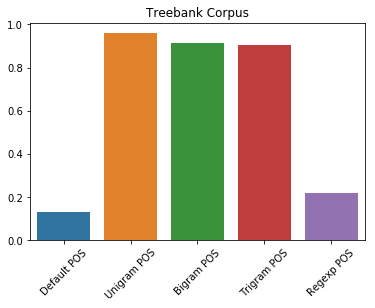

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

x = ['Default POS', 'Unigram POS', 'Bigram POS', 'Trigram POS', 'Regexp POS']
y = [accuracy1_3_1_x1, accuracy1_3_2_x1, accuracy1_3_3_x1, accuracy1_3_4_x1, accuracy1_3_5_x1]
sea.barplot(x, y)
plt.title('Treebank Corpus')
plt.xticks(rotation=45)

In [11]:
### model4 in X3
import nltk
from nltk import word_tokenize, pos_tag

from nltk.corpus import indian
X3 = nltk.corpus.indian
X3_tagged_sents = X3.tagged_sents('hindi.pos')
X3_tagged_sents[0]

[('पूर्ण', 'JJ'),
 ('प्रतिबंध', 'NN'),
 ('हटाओ', 'VFM'),
 (':', 'SYM'),
 ('इराक', 'NNP')]

In [18]:
hindi_numbers = [chr(0x0966), chr(0x0967), chr(0x0968), chr(0x0969), chr(0x096A),
                   chr(0x096B), chr(0x096C), chr(0x096D), chr(0x096E), chr(0x096F)]
print("Hindi Numbers",hindi_numbers)
def isHindiNumber(word):
    isNum = True
    for i in list(word):
        if i not in hindi_numbers:
            isNum = False
            break;
    
    return isNum

    
def features_hindi(sentence, index):
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'prefix-1': sentence[index][0] if sentence[index] != '' else '',
        'prefix-2': sentence[index][:2] if sentence[index] != '' else '',
        'prefix-3': sentence[index][:3] if sentence[index] != '' else '',
        'suffix-1': sentence[index][-1] if sentence[index] != '' else '',
        'suffix-2': sentence[index][-2:] if sentence[index] != '' else '',
        'suffix-3': sentence[index][-3:] if sentence[index] != '' else '',
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit() or isHindiNumber(sentence[index])
    }
import pprint 
pprint.pprint(features_hindi(['पूर्ण', 'प्रतिबंध', 'हटाओ', 'इराक'], 2))

Hindi Numbers ['०', '१', '२', '३', '४', '५', '६', '७', '८', '९']
{'has_hyphen': False,
 'is_first': False,
 'is_last': False,
 'is_numeric': False,
 'next_word': 'इराक',
 'prefix-1': 'ह',
 'prefix-2': 'हट',
 'prefix-3': 'हटा',
 'prev_word': 'प्रतिबंध',
 'suffix-1': 'ओ',
 'suffix-2': 'ाओ',
 'suffix-3': 'टाओ',
 'word': 'हटाओ'}


In [13]:
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]

In [ ]:

X3_size = int(.8 * len(X3_Language))
X3_train = X3_Language[:X3_size]
X3_test = X3_Language[X3_size:]

In [19]:
X3_tagged_sents = nltk.corpus.indian.tagged_sents('hindi.pos')
cutoff = int(.8 * len(X3_tagged_sents))
training_sentences = X3_tagged_sents[:cutoff]
test_sentences = X3_tagged_sents[cutoff:]

 
print(len(training_sentences))
print(len(test_sentences))
 
def transform_to_dataset(tagged_sentences):
    X, y = [], []
    for tagged in tagged_sentences:
        for index in range(len(tagged)):
            X.append(features_hindi(untag(tagged), index))
            y.append(tagged[index][1])
 
    return X, y
 
X, y = transform_to_dataset(training_sentences)
X_test_id, y_test_id = transform_to_dataset(test_sentences)


from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

size=10000

clf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', DecisionTreeClassifier(criterion='entropy'))
])
clf.fit(X[:size], y[:size])
 
print('training OK')
 
X_test, y_test = transform_to_dataset(test_sentences)
 
print("Accuracy:", clf.score(X_test, y_test))



def pos_tag(sentence):
    print('checking...')
    tagged_sentence = []
    tags = clf.predict([features_hindi(sentence, index) for index in range(len(sentence))])
    return zip(sentence, tags)

import platform
print(platform.python_version())

print(list(pos_tag(word_tokenize('हैलो दुनिया, आज कुछ भयानक करने दो!'))))

432
108
training OK
Accuracy: 0.781334780249593
3.6.4
checking...
[('हैलो', 'VAUX'), ('दुनिया', 'NN'), (',', 'PUNC'), ('आज', 'NN'), ('कुछ', 'QF'), ('भयानक', 'JJ'), ('करने', 'VNN'), ('दो', 'QFNUM'), ('!', 'NNPC')]


In [ ]:
import os

os.environ['TREETAGGER_HOME']  ='/home/mister_nags/nltk_data/treetagger/cmd'


from treetagger import TreeTagger

tree = TreeTagger(language='Hindi')
last = tree.tag(X3_tagged_sents)
print(last)
